<a href="https://colab.research.google.com/github/amaliaristantya/intro-python/blob/master/Copy_of_cobain_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering**

Clustering adalah sebuah proses untuk mengelompokan data ke dalam beberapa cluster atau kelompok sehingga data dalam satu cluster memiliki tingkat kemiripan yang maksimum dan data antar cluster memiliki kemiripan yang minimum.



Clustering merupakan metode segmentasi data yang sangat berguna dalam prediksi dan analisa masalah bisnis tertentu. Misalnya Segmentasi pasar, marketing dan pemetaan zonasi wilayah. Mall dan tempat belanja lainnya seringkali bersaing untuk menambah pelanggannya dan mendapatkan keuntungan yang lebih besar.Owner mall memanfaatkan data keanggotaan pelanggan dasar mereka dan mengembangkan machine learning untuk memahami perilaku pembelian dan menetapkan target pelanggan yang tepat sehingga insight pelanggan dapat diberikan kepada tim marketing dan merencanakan strategi yang sesuai.



Data pelanggan terdiri dari beberapa fitur berikut:


1.  CustomerID: ID unik yang diberikan kepada pelanggan
2.  Age: Usia pelanggan
3.  Annual Income(k $): pendapatan tahunan pelanggan
4.  Spending Score:  skor (dari 100) yang diberikan kepada pelanggan oleh otoritas mal, berdasarkan uang yang dibelanjakan dan perilaku pelanggan

**Install dan Import Library**

In [ ]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

**Import data dari file local komputer**

In [ ]:
# Import Dataset
df_customer = pd.read_csv('https://raw.githubusercontent.com/dianrdn/data/master/mall_customer.csv', sep=';')
df_customer

,customer,gender,age,ann_income_kUSD,spending_score
0,1,male,19,15,39
1,2,male,21,15,81
2,3,female,20,16,6
3,4,female,23,16,77
4,5,female,31,17,40
...,...,...,...,...,...
195,196,female,35,120,79
196,197,female,45,126,28
197,198,male,32,126,74
198,199,male,32,137,18


***Informasi statistik dari dataset***

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer         200 non-null    int64 
 1   gender           200 non-null    object
 2   age              200 non-null    int64 
 3   ann_income_kUSD  200 non-null    int64 
 4   spending_score   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df_customer.rename(index=str, columns={'ann_income_kUSD': 'income',
                              'spending_score': 'score'}, inplace=True)
df_customer.head()

,customer,gender,age,income,score
0,1,male,19,15,39
1,2,male,21,15,81
2,3,female,20,16,6
3,4,female,23,16,77
4,5,female,31,17,40


***visualisasi***

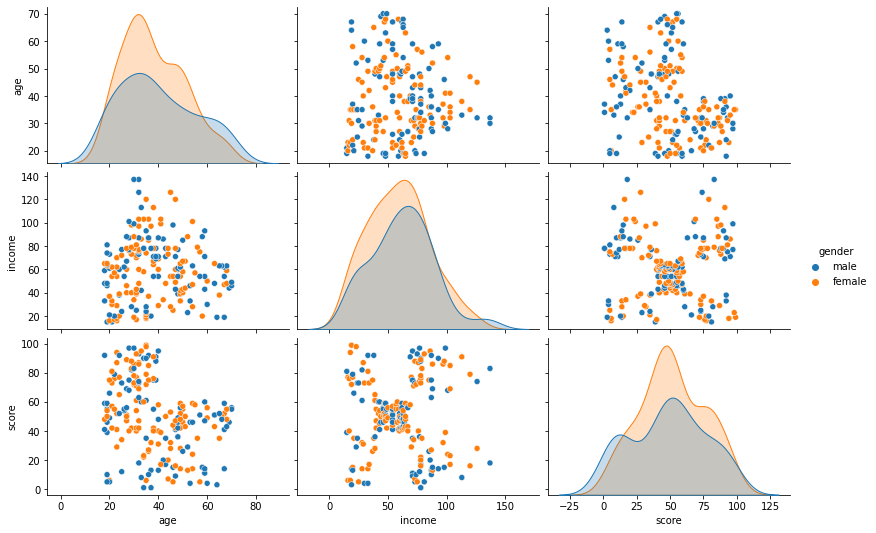

In [ ]:
# Let's see our data in a detailed way with pairplot
X = df_customer.drop(['customer', 'gender'], axis=1)
sns.pairplot(df_customer.drop('customer', axis=1), hue='gender', aspect=1.5)
plt.show()

**Korelasi antar tabel**

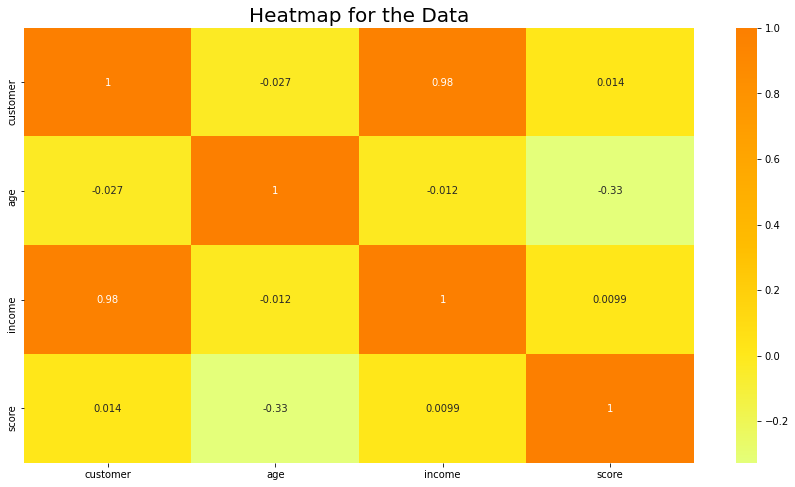

In [ ]:
#Draw Correlation
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df_customer.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

***Data Preprocessing***

In [ ]:
# Check for Missing Values
df_customer.isnull().sum()

customer    0
gender      0
age         0
income      0
score       0
dtype: int64

In [ ]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Select Data
df_standardized = df_customer[['age',	'income',	'score']]

# Fit Standardization
column_names = df_standardized.columns.tolist()
df_standardized[column_names] = scaler.fit_transform(df_standardized[column_names])
df_standardized.sort_index(inplace=True)
df_standardized

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,age,income,score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
10,2.020232,-1.586321,-1.405340
100,-1.137502,0.054964,-0.357158
101,0.728432,0.054964,-0.085407
...,...,...,...
95,-1.065735,-0.021375,0.069879
96,0.584899,-0.021375,-0.124229
97,-0.850435,-0.021375,-0.007764
98,0.656665,0.016795,-0.318337


***Modelling***

***Search for The Optimum Number for Cluster (K)***

In [ ]:
# Transform Data Frame to Numpy Array
customer = df_standardized.to_numpy()
customer

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-1.13750203,  0.05496398, -0.35715836],
       [ 0.7284319 ,  0.05496398, -0.08540743],
       [ 2.02023231,  0.05496398,  0.34162973],
       [-0.92220196,  0.05496398,  0.18634349],
       [ 0.7284319 ,  0.05496398,  0.22516505],
       [-1.28103541,  0.05496398, -0.3183368 ],
       [ 1.94846562,  0.09313341, -0.00776431],
       [ 1.08726535,  0.09313341, -0.16305055],
       [ 2.091999  ,  0.09313341, -0.27951524],
       [ 1.94846562,  0.09313341, -0.08540743],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.87669894,  0.09313341,  0.06987881],
       [-1.42456879,  0.09313341,  0.14752193],
       [-0.06100169,  0.13130284, -0.3183368 ],
       [-1.42456879,  0.13130284, -0.16305055],
       [-1.49633548,  0.16947227, -0.08540743],
       [-1.42456879,  0.16947227, -0.00776431],
       [ 1.73316556,  0.16947227, -0.279

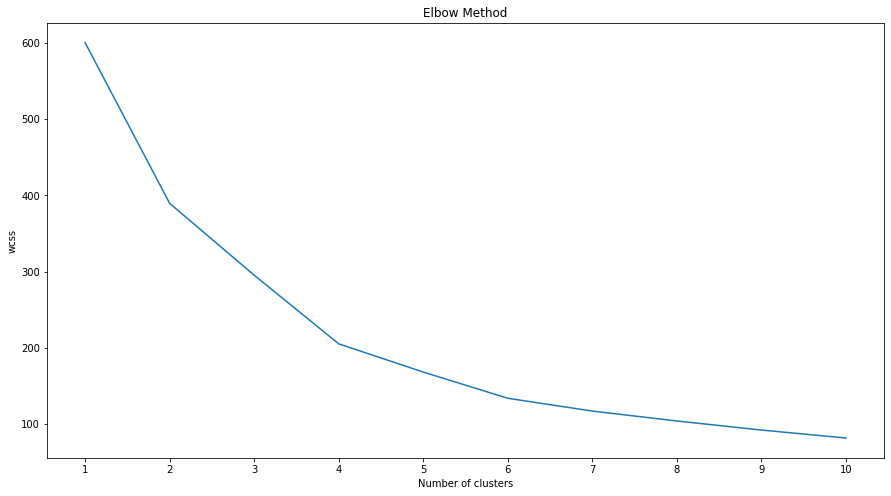

In [ ]:
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(customer)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(customer)
    label = kmeans.labels_
    sil_coeff = silhouette_score(customer, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.33547192894004574
For n_clusters=3, The Silhouette Coefficient is 0.35880977401117803
For n_clusters=4, The Silhouette Coefficient is 0.4039582785148566
For n_clusters=5, The Silhouette Coefficient is 0.41664341513732767
For n_clusters=6, The Silhouette Coefficient is 0.42742814991580175
For n_clusters=7, The Silhouette Coefficient is 0.4159454056620821
For n_clusters=8, The Silhouette Coefficient is 0.40988366030201573
For n_clusters=9, The Silhouette Coefficient is 0.3966641594942873
For n_clusters=10, The Silhouette Coefficient is 0.39499580761033853


***Modelling K-Means Clustering***

In [ ]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_standardized.iloc[:,1:])
df_standardized['label'] = clusters

# Show Clusters
df_standardized

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,age,income,score,label
0,-1.424569,-1.738999,-0.434801,4
1,-1.281035,-1.738999,1.195704,0
10,2.020232,-1.586321,-1.405340,4
100,-1.137502,0.054964,-0.357158,3
101,0.728432,0.054964,-0.085407,3
...,...,...,...,...
95,-1.065735,-0.021375,0.069879,3
96,0.584899,-0.021375,-0.124229,3
97,-0.850435,-0.021375,-0.007764,3
98,0.656665,0.016795,-0.318337,3


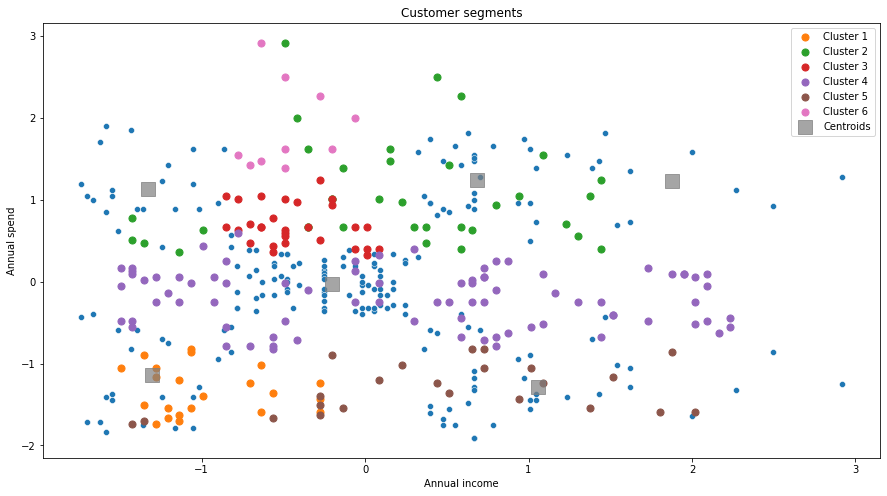

In [ ]:
# Visualising Clusters
sns.scatterplot(x='income', y='score', data=df_standardized)
plt.scatter(df_standardized.age[df_standardized.label == 0], df_standardized['income'][df_standardized.label == 0], s = 50, label = 'Cluster 1')
plt.scatter(df_standardized.age[df_standardized.label == 1], df_standardized['income'][df_standardized.label == 1], s = 50, label = 'Cluster 2')
plt.scatter(df_standardized.age[df_standardized.label == 2], df_standardized['income'][df_standardized.label == 2], s = 50, label = 'Cluster 3')
plt.scatter(df_standardized.age[df_standardized.label == 3], df_standardized['income'][df_standardized.label == 3], s = 50, label = 'Cluster 4')
plt.scatter(df_standardized.age[df_standardized.label == 4], df_standardized['income'][df_standardized.label == 4], s = 50, label = 'Cluster 5')
plt.scatter(df_standardized.age[df_standardized.label == 5], df_standardized['income'][df_standardized.label == 5], s = 50, label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

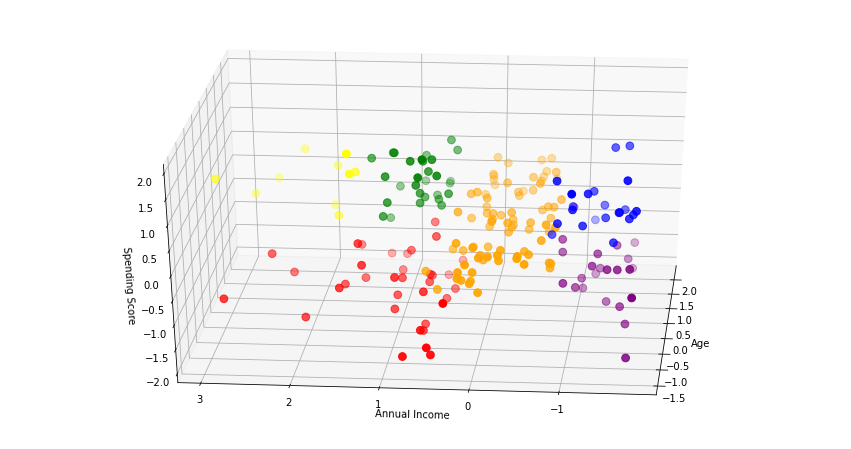

In [ ]:
# Import Module
from mpl_toolkits.mplot3d import Axes3D

# Visualize Clusters
ax = plt.axes(projection='3d')
ax.scatter(df_standardized.age[df_standardized.label == 0], df_standardized['income'][df_standardized.label == 0], df_standardized['score'][df_standardized.label == 0], c='blue', s=60)
ax.scatter(df_standardized.age[df_standardized.label == 1], df_standardized['income'][df_standardized.label == 1], df_standardized['score'][df_standardized.label == 1], c='red', s=60)
ax.scatter(df_standardized.age[df_standardized.label == 2], df_standardized['income'][df_standardized.label == 2], df_standardized['score'][df_standardized.label == 2], c='green', s=60)
ax.scatter(df_standardized.age[df_standardized.label == 3], df_standardized['income'][df_standardized.label == 3], df_standardized['score'][df_standardized.label == 3], c='orange', s=60)
ax.scatter(df_standardized.age[df_standardized.label == 4], df_standardized['income'][df_standardized.label == 4], df_standardized['score'][df_standardized.label == 4], c='purple', s=60)
ax.scatter(df_standardized.age[df_standardized.label == 5], df_standardized['income'][df_standardized.label == 5], df_standardized['score'][df_standardized.label == 5], c='yellow', s=60)
ax.view_init(30, 185)
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

***Hierarchical Clustering***

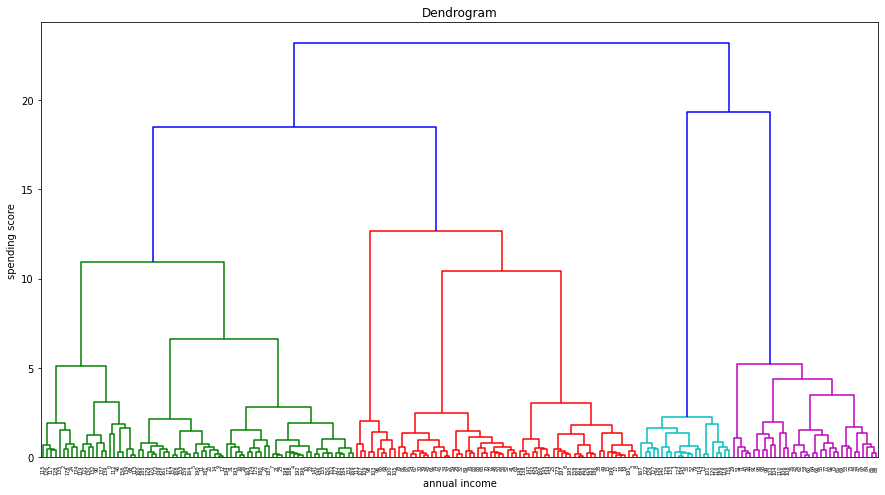

In [ ]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(df_standardized, method='ward'))
plt.title('Dendrogram')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()

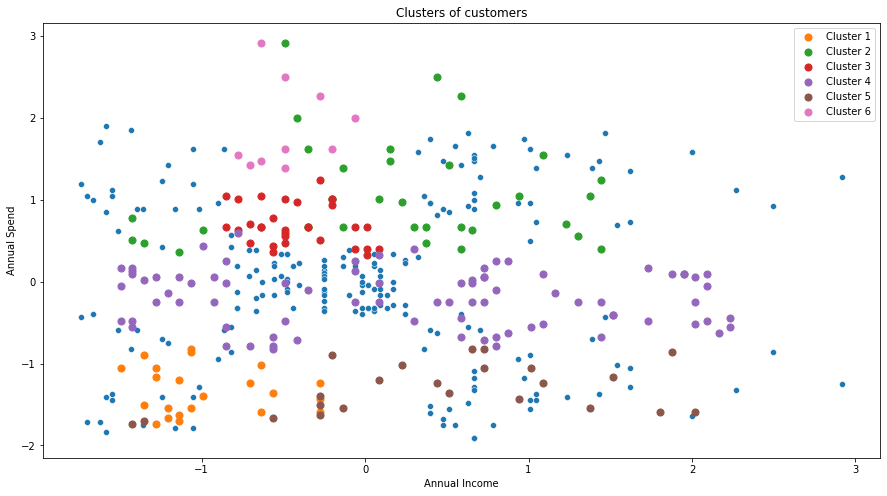

In [ ]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(df_standardized)

# Visualising Clusters for k=6
sns.scatterplot(x='income', y='score', data=df_standardized)
plt.scatter(df_standardized.age[df_standardized.label == 0], df_standardized['income'][df_standardized.label == 0], s = 50, label = 'Cluster 1')
plt.scatter(df_standardized.age[df_standardized.label == 1], df_standardized['income'][df_standardized.label == 1], s = 50, label = 'Cluster 2')
plt.scatter(df_standardized.age[df_standardized.label == 2], df_standardized['income'][df_standardized.label == 2], s = 50, label = 'Cluster 3')
plt.scatter(df_standardized.age[df_standardized.label == 3], df_standardized['income'][df_standardized.label == 3], s = 50, label = 'Cluster 4')
plt.scatter(df_standardized.age[df_standardized.label == 4], df_standardized['income'][df_standardized.label == 4], s = 50, label = 'Cluster 5')
plt.scatter(df_standardized.age[df_standardized.label == 5], df_standardized['income'][df_standardized.label == 5], s = 50, label = 'Cluster 6')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')
plt.legend()
plt.show()

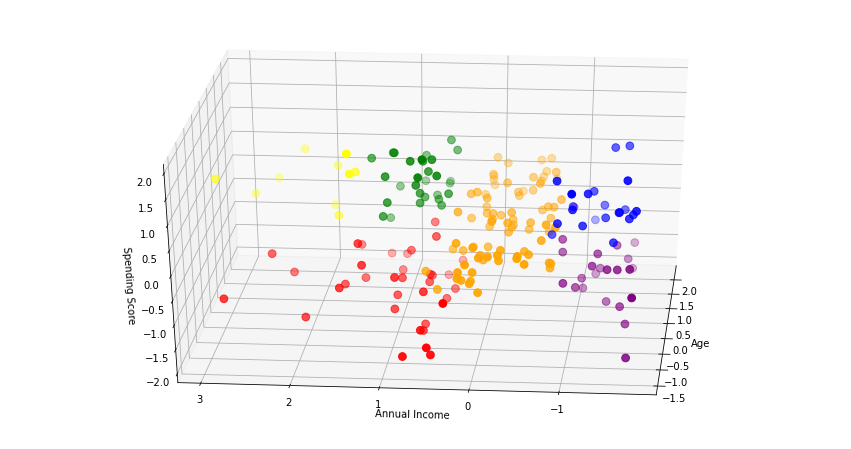

In [ ]:
# Visualize Clusters
ax = plt.axes(projection='3d')
ax.scatter(df_standardized.age[df_standardized.label == 0], df_standardized['income'][df_standardized.label == 0], df_standardized['score'][df_standardized.label == 0], c='blue', s=60)
ax.scatter(df_standardized.age[df_standardized.label == 1], df_standardized['income'][df_standardized.label == 1], df_standardized['score'][df_standardized.label == 1], c='red', s=60)
ax.scatter(df_standardized.age[df_standardized.label == 2], df_standardized['income'][df_standardized.label == 2], df_standardized['score'][df_standardized.label == 2], c='green', s=60)
ax.scatter(df_standardized.age[df_standardized.label == 3], df_standardized['income'][df_standardized.label == 3], df_standardized['score'][df_standardized.label == 3], c='orange', s=60)
ax.scatter(df_standardized.age[df_standardized.label == 4], df_standardized['income'][df_standardized.label == 4], df_standardized['score'][df_standardized.label == 4], c='purple', s=60)
ax.scatter(df_standardized.age[df_standardized.label == 5], df_standardized['income'][df_standardized.label == 5], df_standardized['score'][df_standardized.label == 5], c='yellow', s=60)
ax.view_init(30, 185)
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

***Density Based Clustering***

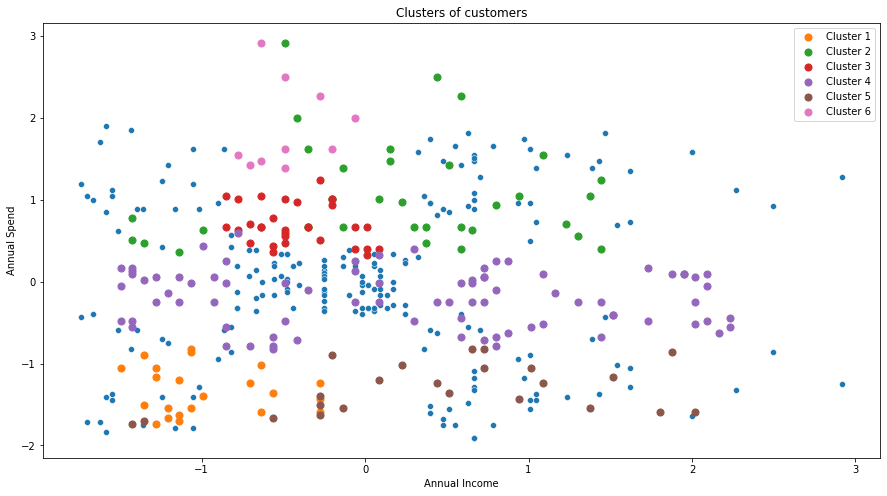

In [ ]:
from sklearn.cluster import DBSCAN 
 
db = DBSCAN(eps=11, min_samples=6).fit(X)
 
sns.scatterplot(x='income', y='score', data=df_standardized)
plt.scatter(df_standardized.age[df_standardized.label == 0], df_standardized['income'][df_standardized.label == 0], s = 50, label = 'Cluster 1')
plt.scatter(df_standardized.age[df_standardized.label == 1], df_standardized['income'][df_standardized.label == 1], s = 50, label = 'Cluster 2')
plt.scatter(df_standardized.age[df_standardized.label == 2], df_standardized['income'][df_standardized.label == 2], s = 50, label = 'Cluster 3')
plt.scatter(df_standardized.age[df_standardized.label == 3], df_standardized['income'][df_standardized.label == 3], s = 50, label = 'Cluster 4')
plt.scatter(df_standardized.age[df_standardized.label == 4], df_standardized['income'][df_standardized.label == 4], s = 50, label = 'Cluster 5')
plt.scatter(df_standardized.age[df_standardized.label == 5], df_standardized['income'][df_standardized.label == 5], s = 50, label = 'Cluster 6')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')
plt.legend()
plt.show()